## Business case
### Help stakeholder to make better financial decisions regarding selling and renovating houses with the potential for big investment returns according to data analysis in order to setup modeling for forecast ..use logisticRegression 

## Import Cleaned data 

In [13]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
import numpy as np
import matplotlib.pyplot as plt
import operator
# import to divide our data into train and test data
from sklearn.model_selection import train_test_split
# import to create polynomial features
from sklearn.preprocessing import PolynomialFeatures
# import of the linear regression model
from sklearn.linear_model import LogisticRegression
# import of our evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

RSEED = 12

In [15]:
log_model=pd.read_csv('data/model_data.csv')
log_model.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,...,47.511,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,...,47.721,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,...,47.738,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,...,47.521,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,...,47.617,-122.045,1800,7503,2015,2,2,0,29,1


## Split Data Training and Test

In [20]:
# Split data into train and test set
import sklearn.model_selection
X =log_model[['sqft_living','bedrooms','Age_house','zipcode']] ## as we have good correlation between price and sqft_living and price and bedrooms
y=log_model['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED)

## Modeling 
### Model name : LogisticRegression 

In [21]:
 #  instantiation model 
from sklearn.linear_model import LogisticRegression 
logistic_model= LogisticRegression()
logistic_model.fit(X_train,y_train)   # be aware you should follow sequence in fit method x_train first then y_train


LogisticRegression()

## Predictions 

In [18]:
y_pred_test = logistic_model.predict(X_test)
y_pred_train = logistic_model.predict(X_train)

## Evaluation Model 

In [19]:
from function import calculate_metrics
print("Results of  train data and test data by logisticRegression Model  ")
print("---"*10)
calculate_metrics(y_train,y_pred_train, y_test, y_pred_test)


Results of  train data and test data by logisticRegression Model  
------------------------------
Metrics on training data
RMSE: 368869.515
R2: -0.001
------------------------------
Metrics on test data
RMSE: 363311.767
R2: -0.001
------------------------------


## Scale use  standardization scaler 

In [22]:
# Scaling with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modeling 
### Model name : LogisticRegression + Scaling data 

In [23]:
 #  instantiation model 
from sklearn.linear_model import LogisticRegression 
logistic_model_2= LogisticRegression()
logistic_model_2.fit(X_train_scaled,y_train)   # be aware you should follow sequence in fit method x_train first then y_train

LogisticRegression()

## Prediction

In [27]:
y_pred_test_scale = logistic_model_2.predict(X_test_scaled)
y_pred_train_scale = logistic_model_2.predict(X_train_scaled)

## Evaluation Model + Scale 

In [28]:
from function import calculate_metrics
print("Results of scale standarization for train data and test data by KNN Model  ")
print("---"*10)
calculate_metrics(y_train,y_pred_train_scale, y_test, y_pred_test_scale)

Results of scale standarization for train data and test data by KNN Model  
------------------------------
Metrics on training data
RMSE: 271551.307
R2: 0.458
------------------------------
Metrics on test data
RMSE: 269161.89
R2: 0.451
------------------------------


## Notice : the result of model total difference after scaling data 

## Scale use Min_Max Normalization scaler 

In [33]:
# Scaling with standard scaler
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train)
X_test_scaled_2 = scaler_2.transform(X_test)

## Modeling 
### Model name : LogisticRegression + Scaling data 

In [34]:
 #  instantiation model 
from sklearn.linear_model import LogisticRegression 
logistic_model_3= LogisticRegression()
logistic_model_3.fit(X_train_scaled_2,y_train)   # be aware you should follow sequence in fit method x_train first then y_train

LogisticRegression()

## Prediction

In [35]:
y_pred_test_scale_3 = logistic_model_3.predict(X_test_scaled_2)
y_pred_train_scale_3= logistic_model_3.predict(X_train_scaled_2)

## Evaluation 

In [36]:
from function import calculate_metrics
print("Results of  train data and test data by logisticRegression Model  ")
print("---"*10)
calculate_metrics(y_train,y_pred_train_scale_3, y_test, y_pred_test_scale_3)

Results of  train data and test data by logisticRegression Model  
------------------------------
Metrics on training data
RMSE: 350912.185
R2: 0.094
------------------------------
Metrics on test data
RMSE: 346816.1
R2: 0.088
------------------------------


## Notice : the result of model total difference with  scaling Min_Max scale not good results

## Classification data to use with logisticRegression as it only used for Classification 

In [37]:
log_model_2=pd.read_csv('data/model_data.csv')
log_model_2.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,...,47.511,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,...,47.721,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,...,47.738,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,...,47.521,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,...,47.617,-122.045,1800,7503,2015,2,2,0,29,1


In [38]:
# Define a custom function to categorize prices
def categorize_price(price):
    if price < 540296.6:
        return 'cheap'  # 0 represents "cheap"
    else:
        return 'expensive'  # 1 represents "expensive"

In [39]:
log_model_2['price'] = log_model_2['price'].apply(categorize_price)

In [40]:
log_model_2.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,cheap,3,1.000,1180,5650,1.000,NaN,...,47.511,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,cheap,3,2.250,2570,7242,2.000,0.000,...,47.721,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,cheap,2,1.000,770,10000,1.000,0.000,...,47.738,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,expensive,4,3.000,1960,5000,1.000,0.000,...,47.521,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,cheap,3,2.000,1680,8080,1.000,0.000,...,47.617,-122.045,1800,7503,2015,2,2,0,29,1


In [41]:
log_model_2['price'] =pd.get_dummies(log_model_2['price'],prefix='n_',drop_first=True, dtype= np.int64 )

In [42]:
log_model_2.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,lat,long,sqft_living15,sqft_lot15,sold_year,sold_month,sold_day,new_renovate,Age_house,new_id
0,0,7129300520,2014-10-13,0,3,1.000,1180,5650,1.000,NaN,...,47.511,-122.257,1340,5650,2014,10,0,0,61,1
1,1,6414100192,2014-12-09,0,3,2.250,2570,7242,2.000,0.000,...,47.721,-122.319,1690,7639,2014,12,1,1,65,1
2,2,5631500400,2015-02-25,0,2,1.000,770,10000,1.000,0.000,...,47.738,-122.233,2720,8062,2015,2,2,2,83,1
3,3,2487200875,2014-12-09,1,4,3.000,1960,5000,1.000,0.000,...,47.521,-122.393,1360,5000,2014,12,1,0,51,1
4,4,1954400510,2015-02-18,0,3,2.000,1680,8080,1.000,0.000,...,47.617,-122.045,1800,7503,2015,2,2,0,29,1


In [44]:
log_model_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21597 non-null  int64  
 1   id             21597 non-null  int64  
 2   date           21597 non-null  object 
 3   price          21597 non-null  int64  
 4   bedrooms       21597 non-null  int64  
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  int64  
 7   sqft_lot       21597 non-null  int64  
 8   floors         21597 non-null  float64
 9   waterfront     19221 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  int64  
 14  sqft_basement  21597 non-null  object 
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17755 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

## Split Data Training and Test

In [45]:
# Split data into train and test set
X =log_model_2[['sqft_living','bedrooms','Age_house','zipcode']] ## as we have good correlation between price and sqft_living and price and bedrooms
y=log_model_2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED ,stratify=y) ## stratify parameter to balance split data ##stratify=y

## Modeling 
### Model name : LogisticRegression 

In [46]:
 #  instantiation model 
from sklearn.linear_model import LogisticRegression 
logistic_model= LogisticRegression()
logistic_model.fit(X_train,y_train)   # be aware you should follow sequence in fit method x_train first then y_train

LogisticRegression()

## Prediction 

In [49]:
y_pred = logistic_model.predict(X_test)
y_pred_train = logistic_model.predict(X_train)

## Evaluation Model 

Confusion Matrix :
[[3030  390]
 [ 790 1190]]
Accuracy Score : 0.7814814814814814
Report : 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      3420
           1       0.75      0.60      0.67      1980

    accuracy                           0.78      5400
   macro avg       0.77      0.74      0.75      5400
weighted avg       0.78      0.78      0.78      5400



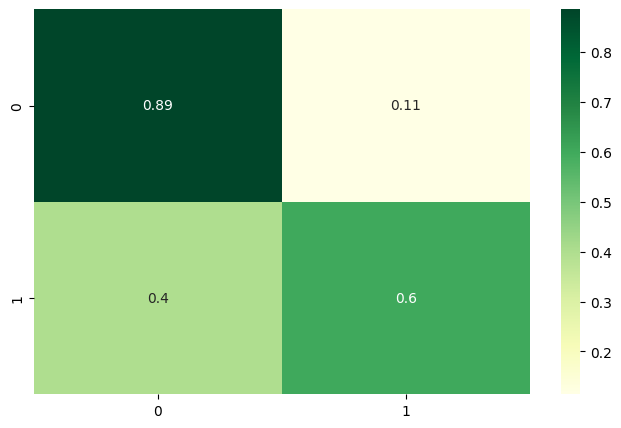

In [50]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


# Here, we are creating a confusion matrix which compares actual and predicted values
#results = confusion_matrix(actual, predicted) 
results = confusion_matrix(y_test, y_pred) 

print ('Confusion Matrix :')
print((results) )

results = results.astype('float') / results.sum(axis=1)[:, np.newaxis]  ### this to make percent instead of used numbers 

sns.heatmap(results, annot=True, cmap='YlGn');

print ('Accuracy Score :',accuracy_score(y_test, y_pred ))

print ('Report : ')
print (classification_report(y_test, y_pred) )